Naveeda Ali
<br>
Date: Mar. 6, 2024
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__40 points__

- Part (b) /__30 points__

- Part (c) /__30 points__

# <center><font color=#46769B>Exercise 8: Runge-Kutta methods</font></center>

## <font color=#46769B>Introduction</font>

In Exercise 7, we considered an ideal simple pendulum consisting of a rigid rod of length $\ell$, with a mass at one end and a frictionless pivot at the other end, such that the pendulum is free to oscillate in the vertical plane under the influence of gravity, with gravitational acceleration $g$. The equation of motion is

$$\theta''(t) + \omega^2 \, \sin\theta(t) = 0 \qquad \qquad (1)$$

where $t$ is time, $\theta(t)$ is the angle of displacement from the vertical axis (where $\theta = 0$ corresponds to the pendulum oriented straight downward), and $\omega = \sqrt{g/\ell}$.

We solved the equation of motion numerically using Euler's method. We found that for small-angle displacements, our numerical solution agreed well with the simple harmonic oscillator solution, with period $T = 2\pi /\omega$, while for large-angle displacements the oscillations have a longer period. 

While Euler's method is easy to implement for solving IVPs, but we saw that it had major shortcomings in terms of accuracy, requiring a large number of steps to achieve even a modest accuracy. Higher-order methods can overcome this difficulty, dramatically decreasing the number of steps needed.

The goal here to learn how to implement higher-order explicit methods, namely, RK2 methods (__midpoint method__ and __Heun's method__) and the __classic RK4 method__.

The goals of this exercise are:
- Gain experience with second-order (and higher) methods for solving ODEs

Required reading:
- *Lesson 8: Second-order methods*


## <font color=#46769B>Part (a)</font>

Starting from the equation of motion for a simple pendulum, given in Eq. (1), define three separate functions to implement three different higher-order methods (each defined using a `def` statement):

- `midpoint(num_steps,theta_0)` that will perform the midpoint method for a given initial condition `theta_0` and number of steps `num_steps`. Your function should end with
```py
    return t, y
```
that is, returning the time points `t` and numerical solution `y` that you obtained.

- `Heun(num_steps,theta_0)` that will do the same for Heun's method.

- `RK4(num_steps,theta_0)` that will do the same for the (classic) RK4 method.

For each, take a fixed interval $[0,5]$ for $t$. 

Finally, perform the following tasks:

- Use your functions to solve for $\theta(t)$ vs $t$ for each of the three methods, for $N=1000$ steps and with an initial condition $\theta_0 = 1$. 

- Make a plot showing $\theta(t)$ vs $t$ for all three methods. Include a legend and axes labels in your plot, and give each line its own line style (solid, dashed, and dot-dashed) using the `linestyle` keyword in `matplotlib.pyplot.plt()`. (See [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) for documentation on this.)




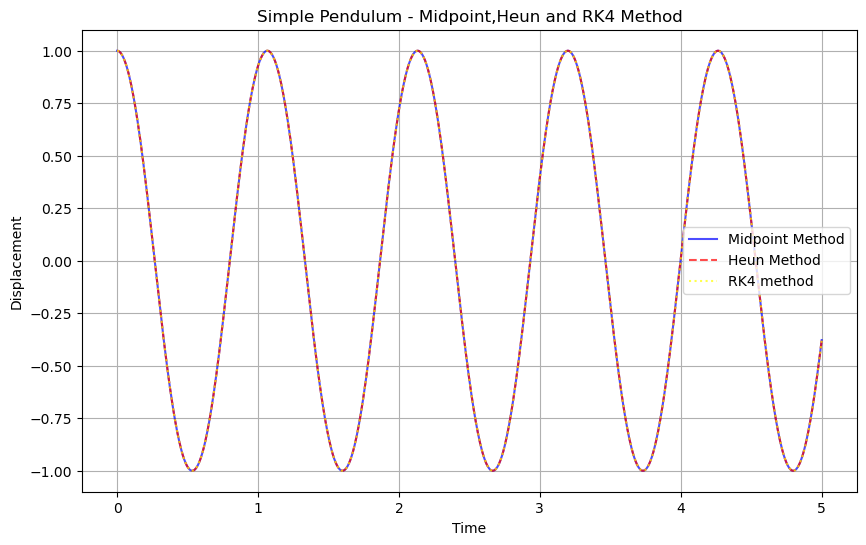

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Constants 
num = 1000
t0,tf = 0,5
theta_0 = 1
theta_prime = 0 
omega = 2*np.pi 

#Define function f(t,y)
def f(t, y):
    theta_0, theta_prime = y
    return np.array([theta_prime, -omega**2 * np.sin(theta_0)])

#Define midpoint method
def midpoint(num_steps,theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h/2, yi+h/2*k1)
        y[i+1] = yi + h*k2

    return t, y

#Define Heun method 
def Heun(num_steps,theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h,yi+h*k1)
        k = 1/2*(k1+k2)
        y[i+1] = yi + h*k
    return t, y

#Define RK4 method 
def RK4(num_steps, theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h/2,yi+h/2*k1)
        k3 = f(ti+h/2,yi+h/2*k2)
        k4 = f(ti+h,yi+h*k3)
        k = (k1+2*k2+2*k3+k4)/6
        y[i+1] = yi + h*k
    return t, y


t_mid, theta_mid = midpoint(num,theta_0)
t_heun, theta_heun = Heun(num,theta_0)
t_RK4 , theta_RK4 = RK4(num,theta_0)

#Plot of Midpoint, Heun and RK4 method 
plt.figure(figsize=(10, 6))
plt.plot(t_mid, theta_mid[:,0], label='Midpoint Method', linestyle='-', color='blue', alpha=0.7)
plt.plot(t_heun, theta_heun[:,0], label='Heun Method', linestyle='--', color='red', alpha=0.7)
plt.plot(t_RK4, theta_RK4[:,0], label='RK4 method', linestyle=':', color='yellow', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Simple Pendulum - Midpoint,Heun and RK4 Method')
plt.legend()
plt.grid(True)
plt.show()
    

## <font color=#46769B>Part (b)</font>

In Exercise 7, Euler's method required about $N \sim 10^7$ steps to converge for an initial condition $\theta_0 = 3$, with tolerance settings `atol = rtol = 1e-2`.

Using your code from Part (a), determine the number of steps $N$ needed for each of the midpoint, Heun, and RK4 methods to converge within the same tolerance, for the same initial displacement.  Make a plot of your final converged results for each method.

Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Not converged yet. Trying 800 steps.
Not converged yet. Trying 1600 steps.
Not converged yet. Trying 3200 steps.
Converged with 3200 steps.


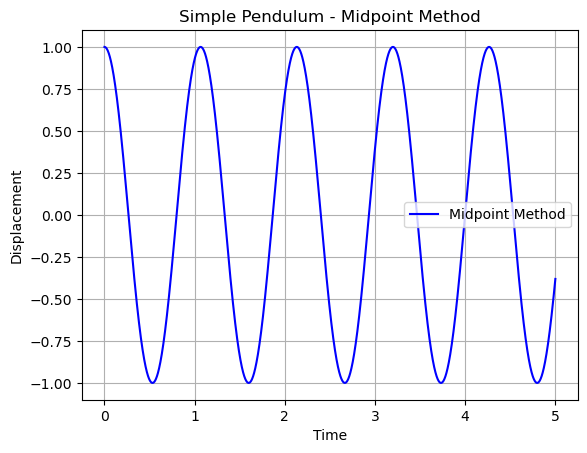

Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Not converged yet. Trying 800 steps.
Not converged yet. Trying 1600 steps.
Not converged yet. Trying 3200 steps.
Converged with 3200 steps.


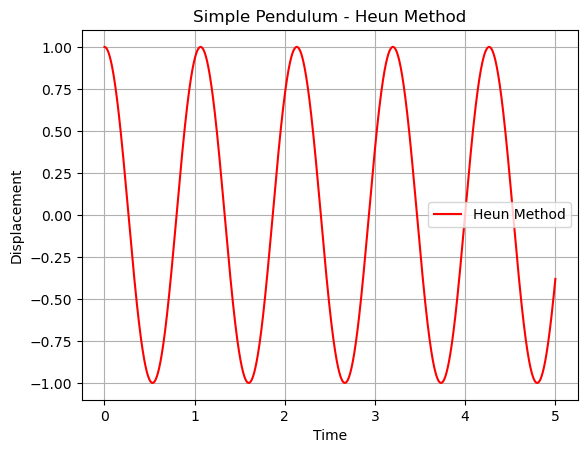

Not converged yet. Trying 200 steps.
Converged with 200 steps.


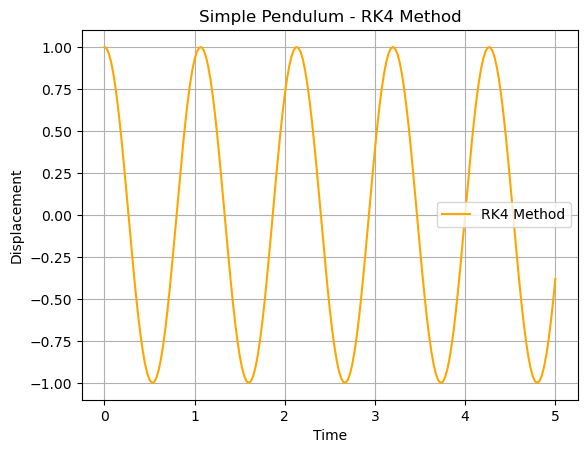

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Constants
num = 1000
t0,tf = 0,5
theta0 = 1
theta_prime = 0 
omega = 2*np.pi 

#Define function f(t,y)
def f(t, y):
    theta_0, theta_prime = y
    return np.array([theta_prime, -omega**2 * np.sin(theta_0)])

#Define Midpoint method
def midpoint(num_steps,theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h/2, yi+h/2*k1)
        y[i+1] = yi + h*k2

    return t, y

#Define Heun method
def Heun(num_steps,theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h,yi+h*k1)
        k = 1/2*(k1+k2)
        y[i+1] = yi + h*k
    return t, y

#Define RK4 method 
def RK4(num_steps, theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h/2,yi+h/2*k1)
        k3 = f(ti+h/2,yi+h/2*k2)
        k4 = f(ti+h,yi+h*k3)
        k = (k1+2*k2+2*k3+k4)/6
        y[i+1] = yi + h*k
    return t, y

#Find convergence for Midpoint method 
num_steps = 100
t_old, y_old = midpoint(num_steps,theta_0)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = midpoint(num_steps,theta_0)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-3)
    y_old = y_new
print("Converged with", num_steps, "steps.")

#Plot numerical answers
theta = y_new[:, 0]
plt.plot(t_new, theta, label="Midpoint Method",color="blue")

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Simple Pendulum - Midpoint Method')
plt.legend()
plt.grid(True)
plt.show()

#Find convergence for Heun method 
num_steps = 100
t_old, y_old = Heun(num_steps,theta_0)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = Heun(num_steps,theta_0)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-3)
    y_old = y_new
print("Converged with", num_steps, "steps.")

#Plot numerical answers
theta = y_new[:, 0]
plt.plot(t_new, theta , label="Heun Method",color="red")

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Simple Pendulum - Heun Method')
plt.legend()
plt.grid(True)
plt.show()

#Find convergence for Heun method 
num_steps = 100
t_old, y_old = RK4(num_steps,theta_0)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = RK4(num_steps,theta_0)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-3)
    y_old = y_new
print("Converged with", num_steps, "steps.")
      
#Plot numerical answers
theta = y_new[:, 0]
plt.plot(t_new, theta , label="RK4 Method",color="orange")

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Simple Pendulum - RK4 Method')
plt.legend()
plt.grid(True)
plt.show()
    

## <font color=#46769B>Part (c)</font>

One of the drawbacks of Runge-Kutta methods is that conservation laws, such as energy or angular momentum conservation, are not exact but only hold at a given level of numerical accuracy, depending on the step size $h$ and the order of the method. That is, the local error incurred with each time step also incurs a violation of conservation laws, which grows with each time step.

In this problem, we will see how the energy of a pendulum, which we expect to be constant, is in fact not constant in time. 

First, let's clarify what the energy $E$ is here. Note that the kinetic energy of the pendulum is 

$$T = \frac{1}{2} m v^2 = \frac{1}{2} m \ell^2 {\theta'}^2 \, $$

where $\ell$ is the length of the pendulum arm and $m$ is the mass of the bob. The potential energy of the pendulum is 

$$U = m g h = m g \ell(1-\cos\theta) = m \ell^2 \omega^2 (1-\cos\theta) \, .$$

Since we don't care about the overall factor of $m \ell^2$, let's set $m\ell^2 = 1$. Therefore the energy is

$$E = T + U = \frac{1}{2} {\theta^\prime}^2 + \omega^2 (1- \cos\theta) \, .$$

Note that the expected exact energy $E_{\rm exact}$ can be calculated by evaluating $E$ at the initial condition. Since energy should be conserved, this is the expected energy at all times.

Your tasks are as follows:

- Solve Eq. (1) for the initial condition $\theta(0) = 1$ and $\theta^\prime(0) = 0$, for the time interval $[0,1000]$ and a step-size $h=0.01$, using Euler's method (also known as RK1), the midpoint method and Heun's method (RK2 methods), and classic RK4.

- Make a log-log plot of the absolute energy difference $\Delta E = |E - E_{\rm exact}|$ vs $t$ for all four methods on a single plot. Include axis labels and a legend.




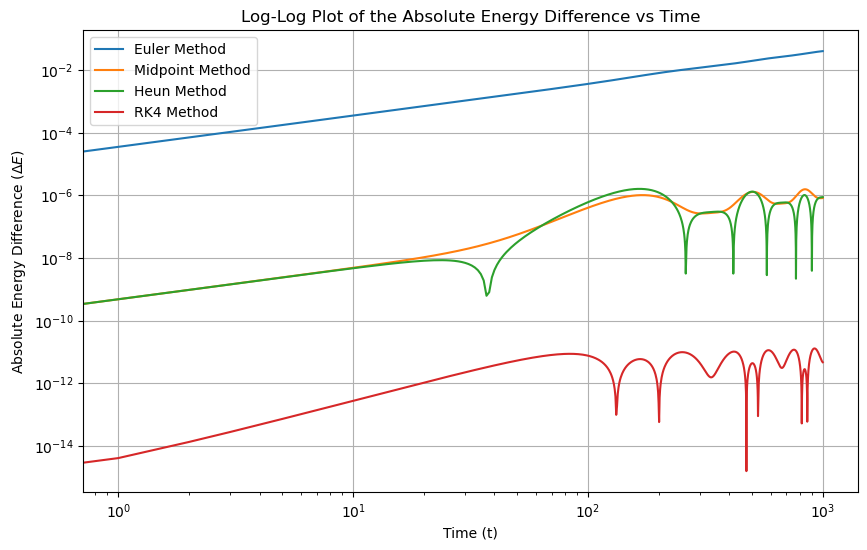

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Constants
num = 1000
t0,tf = 0,1000
theta0 = 1
theta_prime = 0 

#Define function f(t,y) 
def f(t, y):
    theta_0, theta_prime = y
    return np.array([theta_prime, -np.sin(theta_0)])

#Define forward Euler method
def Euler(num_steps,theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = 0.01
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        y[i + 1] = y[i] + h * f(t[i], y[i])
    
    return t, y

def midpoint(num_steps,theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = 0.01
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h/2, yi+h/2*k1)
        y[i+1] = yi + h*k2

    return t, y

def Heun(num_steps,theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = 0.01
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h,yi+h*k1)
        k = 1/2*(k1+k2)
        y[i+1] = yi + h*k
    return t, y

def RK4(num_steps, theta_0):
    t = np.linspace(t0, tf, num_steps + 1)
    h = 0.01
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti,yi)
        k2 = f(ti+h/2,yi+h/2*k1)
        k3 = f(ti+h/2,yi+h/2*k2)
        k4 = f(ti+h,yi+h*k3)
        k = (k1+2*k2+2*k3+k4)/6
        y[i+1] = yi + h*k
    return t, y

#Define fucntion to calculate energy
def calculate_energy(y):
    theta_0 = y[:,0]
    theta_prime = y[:,1]
    return 0.5 * theta_prime**2 + (1 - np.cos(theta_0))

t_euler, theta_euler = Euler(num,theta_0)
t_mid, theta_mid = midpoint(num,theta_0)
t_heun, theta_heun = Heun(num,theta_0)
t_RK4 , theta_RK4 = RK4(num,theta_0)

#Calculate energy for each method 
E_euler = calculate_energy(theta_euler)
E_mid = calculate_energy(theta_mid)
E_heun = calculate_energy(theta_heun)
E_RK4 = calculate_energy(theta_RK4)

#Calculate the exact energy using initial conditions
E_exact = 0.5 * theta_prime**2 + (1 - np.cos(theta0))

#Calculate the difference in energy and exact energy for each method 
DeltaE_euler = np.abs(E_euler - E_exact)
DeltaE_mid = np.abs(E_mid - E_exact)
DeltaE_heun = np.abs(E_heun - E_exact)
DeltaE_RK4 = np.abs(E_RK4 - E_exact)

#Plot a log-log plot for each method and their difference in energy 
plt.figure(figsize=(10, 6))

plt.loglog(t_euler, DeltaE_euler, label='Euler Method')
plt.loglog(t_mid, DeltaE_mid, label='Midpoint Method')
plt.loglog(t_heun, DeltaE_heun, label="Heun Method")
plt.loglog(t_RK4, DeltaE_RK4, label='RK4 Method')

plt.xlabel('Time (t)')
plt.ylabel('Absolute Energy Difference ($\Delta E$)')
plt.title('Log-Log Plot of the Absolute Energy Difference vs Time')
plt.legend()
plt.grid(True)
plt.show()
